# Úkol č. 1 - vizualizace dat a web scraping (do 11. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.psp.cz/sqw/hlasovani.sqw?o=8 týkající hlasování současné poslanecké sněmovny, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Data

 * Měli byste stáhnout data ze všech hlasování současné poslanecké sněmovny (tj. od voleb v roce 2017) a to až na úroveň jednotlivých poslanců. 
 * Data by měla obsahovat i stručný popis toho, o jaké hlasování šlo.

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data a uložte je do vhodného formátu, který se Vám bude dále dobře zpracovávat. 
  * **I když nemusíte mít sněmovnu rádi, snažte se nezahltit server a mezi požadavky na stránku mějte alespoň vteřinu mezeru.**
  * V druhé části Vašeho Jupyter notebooku pracujte se staženými daty v souborech, které jsou výsledkem Vašeho stahovacího skriptu (aby opravující nemusel spouštět stahování z webu).
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Odchody a přeběhnutí poslanců mezi jednotlivými stranami.
    * Jakou mají jednotliví poslanci docházku (účast na hlasování) a jak jsou na tom s docházkou strany jako celek.
    * Jak často spolu jednotlivé strany hlasují ve shodě a jak často hlasují odlišně.
    * Jak jsou poslanci jednotlivých stran jednotní v hlasování (jak často hlasují stejně, kdo jsou největší rebelové).

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * Ve vizualizacích a grafech nějak zachyťte časový vývoj (např. jak se mění docházka, shoda mezi stranami atp.).
  * Najděte jednotlivé poslance, kteří se nejvíce shodují při svém hlasování či kteří mají co nejpodobnější účast na hlasování.
  * Zkuste rozlišit v datech důležitá hlasování a zpracujte vizualizace (také) pro ně.
  * Zkuste najít hlasování, kde poslanci hlasovali nejvíce jinak, než obvykle.
  
## Tipy a triky
  * Balíčky iportujte na začátku notebooku (příp. na začátku scrapovací a pak na začátku vizualizační části).
  * Využívejte markdown buňky (jako je ta, ve které je tento text) a naspisy, abyste usnadnily orientaci opravující(mu).
  * Pečlivě si vybírejte grafy a vizualizace, aby co nejlépe vyjádřily to, co vyjádřit chcete. Doporučuji projít si pro inspiraci alespoň galerie balíčků `matplotlib` a `seaborn`.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte Jupyter Notebook (příp. doplněn skripty), ale i soubor(y) se staženými daty (ať opravující nemusí stahovat data).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

# Import a příprava

In [2]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import requests
from bs4 import BeautifulSoup
import time

In [5]:
strany = ['ANO', 'ODS', 'Pirati', 'SPD', 'CSSD', 'KSCM', 'KDU-CSL', 'TOP09', 'STAN', 'Celkem']

# Stažení dat

## Stažení dat o hlasování jednotlivých stran
Pro každé hlasování jsem z nadpisu stránky stáhl popis hlasování, který obsahuje číslo schůze, číslo hlasování, datum a čas a bod, kterého se hlasování týkalo. Popis jsem vždy uložil do jednoho řádku do souboru. Za popis jsem vždy uložil tabulku s daty o hlasování jednotlivých stran. V pozdějších hlasováních se objevila strana nezařazeno, tu jsem do dat nezahrnul. Stahování jsem musel pouštět vícekrát, kvůli chybějícím stránkám nebo nezveřejněným výsledkům. Vždy jsem pouze přepsal počáteční index a pokračoval ve stahování.

In [13]:
for urlNum in range(67018, 73902):
    if (urlNum % 60 == 0): # Progres
        print(urlNum)
    page = requests.get("https://www.psp.cz/sqw/hlasy.sqw?g=" + str(urlNum) + "=cz")
    soup = BeautifulSoup(page.content.decode('windows-1250'), 'html.parser')
    title = soup.find(class_="page-title-x")
    desc = title.get_text() + '\n' # Popis hlasování
    f = open("votes_partys.csv", "a")
    f.write(desc)
    f.close()
    
    url = 'https://www.psp.cz/sqw/hlasy.sqw?g=' + str(urlNum) + '=cz' 
    dfs = pd.read_html(url,flavor='html5lib')
    data = dfs[1] # Statistiky o hlasování stran
    data = data.drop(['Klub'], axis = 1)
    data = data.drop([9]) # Smazání strany nezařazeno ze statistik
    data.columns = ['Poslancu', 'Ano', 'Ne', 'Neprihlasen', 'Zdrzel', 'Omluven']
    data.index = strany
    data.to_csv('votes_partys.csv', mode = 'a', index = 'false')
    time.sleep(1)

69480
69540
69600
69660
69720
69780
69840
69900
69960
70020
70080
70140
70200
70260
70320
70380
70440
70500
70560
70620
70680
70740
70800
70860
70920
70980
71040
71100
71160
71220
71280
71340
71400
71460
71520
71580
71640
71700
71760
71820
71880
71940
72000
72060
72120
72180
72240
72300
72360
72420
72480
72540
72600
72660
72720
72780
72840
72900
72960
73020
73080
73140
73200
73260
73320
73380
73440
73500
73560
73620
73680
73740
73800
73860


# Stažení dat o hlasování jednotlivých poslanců
Opět jsem pro každé hlasování stáhl a uložil popis. Data o hlasování jednotlivých poslanců, jsem potom parsoval z html kodu stránky. Pro každého poslance jsem získal jeho jméno, hlas a stranu. Každého poslance jsem zapsal do jednoho řádku v datasetu. Celý dataset jsem poté zapsal do souboru. Nezařazené poslance jsem tentokrát zahrnul do dat. Opět jsem stahování musel pouštět vícekrát.

In [10]:
strany = ['ANO', 'ODS', 'Pirati', 'SPD', 'CSSD', 'KSCM', 'KDU-CSL', 'TOP09', 'STAN', 'Nezarazeno'] # Přidáno pro zjištění statistik o nezařazených poslancích
for urlNum in range(67018, 73902):
    if (urlNum % 60 == 0): # Progres
        print(urlNum)
    page = requests.get("https://www.psp.cz/sqw/hlasy.sqw?g=" + str(urlNum) + "=cz")
    soup = BeautifulSoup(page.content.decode('windows-1250'), 'html.parser')
    title = soup.find(class_="page-title-x")
    desc = title.get_text() + '\n' # Popis hlasování
    f = open("votes_members.csv", "a")
    f.write(desc)
    f.close()
    
    iterator = iter(strany)
    data = pd.DataFrame(columns = ['Jmeno', 'Hlas', 'Strana']) # Inicialazice dat o hlasování jednotlivých poslanců
    a = soup.find_all(class_="results") # Získání listu s výsledky jednotlivých stran
    num = 0
    for b in a:
        if (num % 2 == 1): # Pouze některé položky listu a obsahují užitečná data, ostatní jsou prázdné
            strana = next(iterator)
        num += 1
        c = b.select("li") # Získání odkazů s jednotlivými poslanci
        for d in c:
            text = d.get_text() # Získání textu s hlasem a jménem poslance
            data = data.append({'Jmeno' : text[2:], 'Hlas' : text[0], 'Strana' : strana}, ignore_index = 'True')
    data.to_csv('votes_members.csv', mode = 'a', index = 'false', encoding='windows-1250')
    time.sleep(1)

73680
73740
73800
73860


# Vizualizace dat

In [7]:
votes = 6879

## Vizualizace přechodů poslanců
Načetl jsem celý soubor do jednoho datasetu a z něj pak dostával datasety pro jednotlivá hlasování. (Takto jsem postupoval téměř u všech vizualizací) Vždy jsem načetl data o dvou po sobě jdoucích hlasováních a porovnával strany jednotlivých poslanců. Také jsem kontroloval, jestli poslanec ze sněmovny úplně neodešel nebo do ní naopak nenastoupil. Myslím, že samotná tabulka nejlépe vystihuje přechody poslanců, proto jsem ji zvolil jako vizualizaci.

In [6]:
dataChanges = pd.DataFrame(columns = ['Kdy', 'Jmeno', 'Z', 'Do']) # Inicializace dat s přestupy
dataWhole = pd.read_csv('votes_members.csv', engine = 'python', skiprows = 1)
for i in range(votes - 1):
    if (i % 60 == 0): # Progres
        print(i)
    desc = dataWhole.head((i - 1) * 202 + 201).tail(1) # Získání řádku s popisem hlasování
    data1 = dataWhole.head(i * 202 + 200).tail(200) # Získání dat o 1. hlasování
    data2 = dataWhole.head((i + 1) * 202 + 200).tail(200) # Získání dat o 2. hlasování
    data1 = data1.drop(['Unnamed: 0'], axis = 1)
    data2 = data2.drop(['Unnamed: 0'], axis = 1)
    data1.index = data1.Jmeno
    data2.index = data2.Jmeno
    for member in data1.index:
        if (member in data2.index):
            if (data1.loc[member, 'Strana'] != data2.loc[member, 'Strana']): # Poslanec změnil stranu
                dataChanges = dataChanges.append({'Kdy' : desc.iloc[0, 0], 'Jmeno' : member, 'Z' : data1.loc[member, 'Strana'], 'Do': data2.loc[member, 'Strana']}, ignore_index = 'True')
        else: # Poslanec odešel ze sněmovny
            dataChanges = dataChanges.append({'Kdy' : desc.iloc[0, 0], 'Jmeno' : member, 'Z' : data1.loc[member, 'Strana'], 'Do': '-'}, ignore_index = 'True')
    for member in data2.index:
        if (member not in data1.index): # Poslanec nastoupil do sněmovny
            dataChanges = dataChanges.append({'Kdy' : desc.iloc[0, 0], 'Jmeno' : member, 'Z' : '-', 'Do': data2.loc[member, 'Strana']}, ignore_index = 'True')
    
display(dataChanges)

0
60
120
180
240
300
360
420
480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
1260
1320
1380
1440
1500
1560
1620
1680
1740
1800
1860
1920
1980
2040
2100
2160
2220
2280
2340
2400
2460
2520
2580
2640
2700
2760
2820
2880
2940
3000
3060
3120
3180
3240
3300
3360
3420
3480
3540
3600
3660
3720
3780
3840
3900
3960
4020
4080
4140
4200
4260
4320
4380
4440
4500
4560
4620
4680
4740
4800
4860
4920
4980
5040
5100
5160
5220
5280
5340
5400
5460
5520
5580
5640
5700
5760
5820
5880
5940
6000
6060
6120
6180
6240
6300
6360
6420
6480
6540
6600
6660
6720
6780
6840


Kdy                         Jmeno           Z          Do
0    1. schůze                  Jiří Hlavatý         ANO           -
1    1. schůze   Jaroslava Pokorná Jermanová         ANO           -
2    1. schůze                   Martin Půta        STAN           -
3    1. schůze                 Eva Matyášová           -         ANO
4    1. schůze                    Milan Pour           -         ANO
5    1. schůze                    Petr Pávek           -        STAN
6   11. schůze              Bohuslav Sobotka        CSSD           -
7   11. schůze                 Roman Sklenák           -        CSSD
8   15. schůze                Robert Pelikán         ANO           -
9   15. schůze             Monika Červíčková           -         ANO
10  19. schůze             Martin Stropnický         ANO           -
11  19. schůze                  Petr Venhoda           -         ANO
12  24. schůze              Vladimír Koníček        KSCM           -
13  24. schůze               Marie Pěnčíková           -        KSCM
14  27. schůze                  Václav Klaus         ODS  Nezarazeno
15  27. schůze                  Marian Bojko         SPD  Nezarazeno
16  27. schůze               Ivana Nevludová         SPD  Nezarazeno
17  27. schůze                 Lubomír Volný         SPD  Nezarazeno
18  27. schůze                       Dan Ťok         ANO           -
19  27. schůze                Milan Chovanec        CSSD           -
20  27. schůze                  Iva Kalátová           -         ANO
21  27. schůze                 Václav Votava           -        CSSD
22  28. schůze  Zuzana Majerová Zahradníková         ODS  Nezarazeno
23  30. schůze                 Mikuláš Peksa      Pirati           -
24  30. schůze             František Navrkal           -      Pirati
25  32. schůze                  Radka Maxová         ANO           -
26  32. schůze           Veronika Vrecionová         ODS           -
27  32. schůze                  Ondřej Babka           -         ANO
28  32. schůze                    Petr Bendl           -         ODS
29  40. schůze              Jaroslav Foldyna        CSSD  Nezarazeno
30  42. schůze              Jaroslav Foldyna  Nezarazeno         SPD
31  56. schůze                    Petr Vrána         ANO           -
32  56. schůze                Tereza Hyťhová         SPD  Nezarazeno
33  56. schůze                Irena Blažková           -         ANO

## Vizualizace docházky stran
Pro každé hlasování jsem spočítal docházku jednotlivých stran. Potom jsem vždy upravil průměrnou docházku pomocí počtu již projitých hlasování.

0
60
120
180
240
300
360
420
480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
1260
1320
1380
1440
1500
1560
1620
1680
1740
1800
1860
1920
1980
2040
2100
2160
2220
2280
2340
2400
2460
2520
2580
2640
2700
2760
2820
2880
2940
3000
3060
3120
3180
3240
3300
3360
3420
3480
3540
3600
3660
3720
3780
3840
3900
3960
4020
4080
4140
4200
4260
4320
4380
4440
4500
4560
4620
4680
4740
4800
4860
4920
4980
5040
5100
5160
5220
5280
5340
5400
5460
5520
5580
5640
5700
5760
5820
5880
5940
6000
6060
6120
6180
6240
6300
6360
6420
6480
6540
6600
6660
6720
6780
6840


(0.5, 1.0)

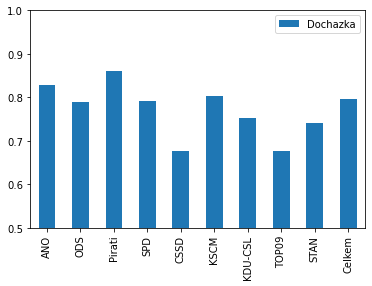

In [7]:
framesNum = 1 # Číslo procházeného hlasování
dataDoch = {} # Inicializace dat o docházce stran
dataWhole = pd.read_csv('votes_partys.csv', engine = 'python', skiprows = 1)
for i in range(votes):
    if (i % 60 == 0): # Progres
        print(i)
    data = dataWhole.head(i * 12 + 10).tail(10) # Získání dat o jednom hlasování
    data = data.drop(['Unnamed: 0'], axis = 1)
    data.index = strany
    data = data.astype('int32') # Z nějakého důvodu jsou data typu Object a je tedy nutné přetypování
    data.insert(6, 'Dochazka', 0)
    data.loc[:, 'Dochazka'] = (data.Ano + data.Ne + data.Zdrzel) / data.Poslancu # Hlasy Ano, Ne a Zdrzel znamenají, že poslanec se dostavil na hlasování
    if (i == 0):
        dataDoch = data.loc[:, ['Dochazka']] # Nastavení hodnoty docházky podle 1. hlasování
    else: 
        framesNum += 1
        dataDoch.loc[:, 'Dochazka'] = (dataDoch.Dochazka * (framesNum - 1) + data.Dochazka) / framesNum # Úprava průměrné docházky

dataDoch.plot.bar()
plt.ylim(0.5, 1)

## Vizualizace docházky jednotlivých poslanců
Pro každé hlasování jsem určil, jestli na něm poslanec byl nebo ne. Pro každého poslance jsem si udržoval počet hlasování, kdy byl poslanec členem sněmovny. Podle toho jsem potom mohl aktualizovat průměrnou docházku. Pokud na hlasování přibyl nový poslanec, bylo ho potřeba přidat do výsledného datasetu. Na konci jsem data seřadil podle docházky a grafem znázornil 20 poslanců s největší a 20 s nejmenší docházkou. Pro všechna data trvá výpočet 15 - 20 minut, proto doporučuji spustit např. pouze pro 500 hlasování.

0
60
120
180
240
300
360
420
480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
1260
1320
1380
1440
1500
1560
1620
1680
1740
1800
1860
1920
1980
2040
2100
2160
2220
2280
2340
2400
2460
2520
2580
2640
2700
2760
2820
2880
2940
3000
3060
3120
3180
3240
3300
3360
3420
3480
3540
3600
3660
3720
3780
3840
3900
3960
4020
4080
4140
4200
4260
4320
4380
4440
4500
4560
4620
4680
4740
4800
4860
4920
4980
5040
5100
5160
5220
5280
5340
5400
5460
5520
5580
5640
5700
5760
5820
5880
5940
6000
6060
6120
6180
6240
6300
6360
6420
6480
6540
6600
6660
6720
6780
6840


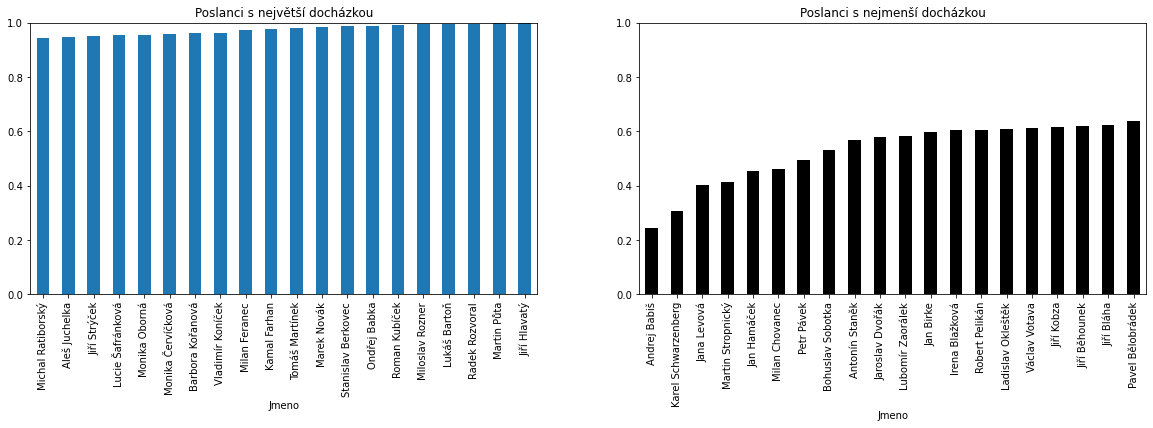

In [8]:
dataDoch = {} # Inicializace dat o docházce poslanců
dataWhole = pd.read_csv('votes_members.csv', engine = 'python', skiprows = 1)
for i in range(votes):
    if (i % 60 == 0): # Progres
        print(i)
    data = dataWhole.head(i * 202 + 200).tail(200) # Získání dat o jednom hlasování
    data = data.drop(['Unnamed: 0'], axis = 1)
    data.insert(3, 'Dochazka', 0)
    data.index = data.Jmeno
    data = data.drop(['Jmeno'], axis = 1)
    if (i == 0):
        dataDoch = data.loc[:, ['Dochazka']] # Nastavení dat o docházce na počáteční hodnotu 0
        dataDoch.insert(1, 'Pocet', 0) # Počet hlasování, kdy byl poslanec členem sněmovny
    for member in data.index:
        vote = data.loc[member, 'Hlas']
        if (vote == 'A' or vote == 'N' or vote == 'Z'): # Hlasy A, N a Z znamenají, že poslanec se dostavil na hlasování
            data.loc[member, 'Dochazka'] = 1
        attend = data.loc[member, 'Dochazka']
        if (member in dataDoch.index): # Poslanec už je členem sněmovny
            dataDoch.loc[member, 'Pocet'] += 1
            number = dataDoch.loc[member, 'Pocet']
            dataDoch.loc[member, 'Dochazka'] = (dataDoch.loc[member, 'Dochazka'] * (number - 1) + attend) / number # Úprava průměrné docházky
        else: # Poslanec je novým členem sněmovny, je třeba ho přidat
            newRow = pd.Series({'Dochazka': attend,'Pocet': 1,},name = member)
            dataDoch = dataDoch.append(newRow)

sortedDoch = dataDoch.sort_values(['Dochazka'])
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.ylim(0, 1)
plt.title('Poslanci s největší docházkou')
sortedDoch.Dochazka.tail(20).plot.bar()
plt.subplot(122)
plt.ylim(0, 1)
plt.title('Poslanci s nejmenší docházkou')
sortedDoch.Dochazka.head(20).plot.bar(color = 'Black')

## Vizualizace shody stran
Pro každé hlasování jsem pro každou dvojci stran spočítal, jestli se ve výsledku hlasování shodují nebo ne. Poté jsem pomocí počtu již projitých hlasování vždy aktualizoval průměrnou shodu stran. Výsledek jsem znázornil pomocí heatmapy.

0
60
120
180
240
300
360
420
480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
1260
1320
1380
1440
1500
1560
1620
1680
1740
1800
1860
1920
1980
2040
2100
2160
2220
2280
2340
2400
2460
2520
2580
2640
2700
2760
2820
2880
2940
3000
3060
3120
3180
3240
3300
3360
3420
3480
3540
3600
3660
3720
3780
3840
3900
3960
4020
4080
4140
4200
4260
4320
4380
4440
4500
4560
4620
4680
4740
4800
4860
4920
4980
5040
5100
5160
5220
5280
5340
5400
5460
5520
5580
5640
5700
5760
5820
5880
5940
6000
6060
6120
6180
6240
6300
6360
6420
6480
6540
6600
6660
6720
6780
6840


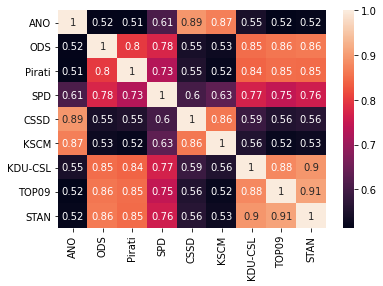

In [9]:
framesNum = 1 # Číslo procházeného hlasování
dataStejneTotal = {} # Inicializace dat o shodě stran
dataWhole = pd.read_csv('votes_partys.csv', engine = 'python', skiprows = 1)
for i in range(votes):
    if (i % 60 == 0): # Progres
        print(i)
    data = dataWhole.head(i * 12 + 10).tail(10) # Získání dat o jednom hlasování
    data = data.drop(['Unnamed: 0'], axis = 1)
    data.index = strany
    data = data.drop(['Celkem'])
    data = data.astype('int32') # Z nějakého důvodu jsou data typu Object a je tedy nutné přetypování
    data.insert(6, 'Vysledek', 0)
    data.loc[:, 'Vysledek'] = data.Ano - data.Ne # Kladné číslo pro Ano, záporné pro Ne
    data.loc[:, 'Vysledek'] = data['Vysledek'].apply(lambda x: 1 if x > 0 else 0) # 1 pro Ano, 0 pro Ne
    dataStejne = data.drop(['Poslancu', 'Ano', 'Ne', 'Neprihlasen', 'Zdrzel', 'Omluven', 'Vysledek'], axis = 1)
    num = 0 # Index, kam přidat další sloupec
    for party in data.index: # Vytvoření matice každá s každou stranou
        dataStejne.insert(num, party, 0)
        num += 1
    for partyA in data.index:
        for partyB in data.index:
            # Součet výsledků je 0 nebo 2 v případě shody a 1 v případě neshody, převod na 1 pro shodu a 0 pro neshodu
            dataStejne.loc[partyA, partyB] = abs(data.loc[partyA, 'Vysledek'] + data.loc[partyB, 'Vysledek'] - 1)
    if (i == 0):
        dataStejneTotal = dataStejne # Nastavení hodnot shody stran podle 1. hlasování
    else:
        framesNum += 1
        for partyA in data.index:
            for partyB in data.index:
                # Úprava průměrné shdody stran
                dataStejneTotal.loc[partyA, partyB] = (dataStejneTotal.loc[partyA, partyB] * (framesNum - 1) + dataStejne.loc[partyA, partyB]) / framesNum

sns.heatmap(dataStejneTotal, annot=True)

## Vizualizace jednotnosti stran
K určení jednotnosti stran jsem využil entropii, respektive její hodnotu odečtenou od jedničky. Přišlo mi to lepší, než pouze hlídat, jestli strana hlasovala jednotně nebo ne. Takhle se od sebe odliší např. hlasování, kdy třeba 95 % hlasovalo stejně a hlasování, kdy poslanci hlasovali skoro 50 na 50. Pro každé hlasování jsem tedy takto spočítal jednotnost pro jednotlivé strany a pak aktualizoval jednotnost průměrnou. K mému překvapení vyšly jednotnosti dost vysoké.

0
60
120
180
240
300
360
420
480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
1260
1320
1380
1440
1500
1560
1620
1680
1740
1800
1860
1920
1980
2040
2100
2160
2220
2280
2340
2400
2460
2520
2580
2640
2700
2760
2820
2880
2940
3000
3060
3120
3180
3240
3300
3360
3420
3480
3540
3600
3660
3720
3780
3840
3900
3960
4020
4080
4140
4200
4260
4320
4380
4440
4500
4560
4620
4680
4740
4800
4860
4920
4980
5040
5100
5160
5220
5280
5340
5400
5460
5520
5580
5640
5700
5760
5820
5880
5940
6000
6060
6120
6180
6240
6300
6360
6420
6480
6540
6600
6660
6720
6780
6840


(0.8, 1.0)

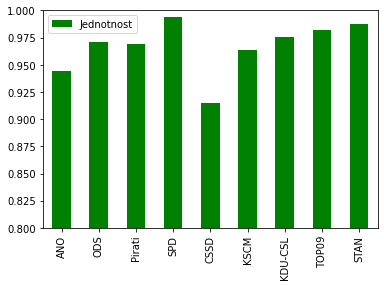

In [10]:
framesNum = 1 # Číslo procházeného hlasování
dataJednot = {} # Inicializace dat o jednotnosti stran
dataWhole = pd.read_csv('votes_partys.csv', engine = 'python', skiprows = 1)
for i in range(votes):
    if (i % 60 == 0): # Progres
        print(i)
    data = dataWhole.head(i * 12 + 10).tail(10) # Získání dat o jednom hlasování
    data = data.drop(['Unnamed: 0'], axis = 1)
    data.index = strany
    data = data.drop(['Celkem']) # Celková jednotnost nedává smysl
    data = data.astype('int32') # Z nějakého důvodu jsou data typu Object a je tedy nutné přetypování
    data.insert(6, 'Jednotnost', 0)
    for party in data.index:
        if (data.loc[party, 'Ano'] + data.loc[party, 'Ne'] == 0): # Pokud jsou obě množiny prázdné, jednotnost bude 1
            data.loc[party, 'Jednotnost'] = 1
        else:   
            x = data.loc[party, 'Ano'] / (data.loc[party, 'Ano'] + data.loc[party, 'Ne']) # Poměr množin
            y = data.loc[party, 'Ne'] / (data.loc[party, 'Ano'] + data.loc[party, 'Ne'])
            if (x == 0 or y == 0): # Pokud je jedna z množin prázdná, jednotnost bude 1
                data.loc[party, 'Jednotnost'] = 1
            else:
                data.loc[party, 'Jednotnost'] = 1 - (-x * np.log2(x) - y * np.log2(y)) 
    if (i == 0):
        dataJedn = data.loc[:, ['Jednotnost']] # Nastavení hodnot jednotnosti stran podle 1. hlasování
    else: 
        framesNum += 1
        dataJedn.loc[:, 'Jednotnost'] = (dataJedn.Jednotnost * (framesNum - 1) + data.Jednotnost) / framesNum # Úprava průměrných jednotností stran

dataJedn.plot.bar(color = 'Green')
plt.ylim(0.8, 1)

## Vizualizace časového vývoje docházky
Pro každé hlasování jsem spočítal docházku a výsledek připojil jako řádek do výsledného datasetu. Pro přehlednost jsem grafem znázornil pouze vývoj celkové docházky. 

0
60
120
180
240
300
360
420
480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
1260
1320
1380
1440
1500
1560
1620
1680
1740
1800
1860
1920
1980
2040
2100
2160
2220
2280
2340
2400
2460
2520
2580
2640
2700
2760
2820
2880
2940
3000
3060
3120
3180
3240
3300
3360
3420
3480
3540
3600
3660
3720
3780
3840
3900
3960
4020
4080
4140
4200
4260
4320
4380
4440
4500
4560
4620
4680
4740
4800
4860
4920
4980
5040
5100
5160
5220
5280
5340
5400
5460
5520
5580
5640
5700
5760
5820
5880
5940
6000
6060
6120
6180
6240
6300
6360
6420
6480
6540
6600
6660
6720
6780
6840


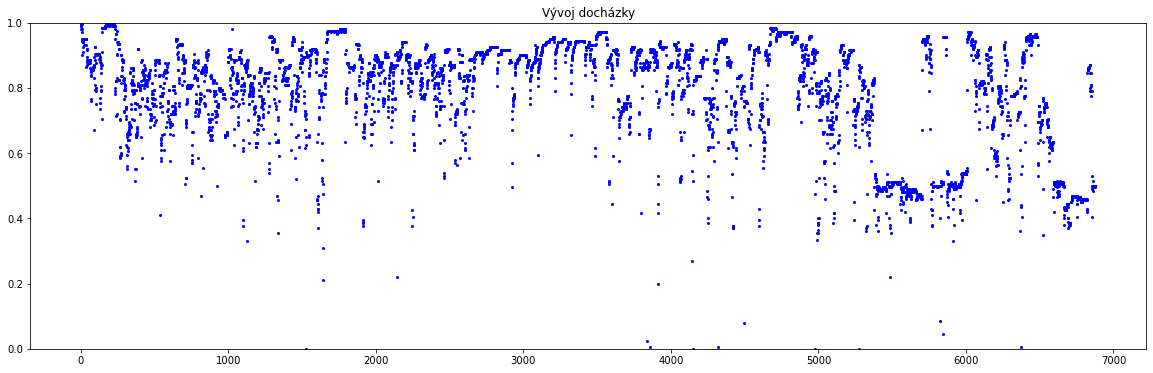

In [20]:
dataDochTime = pd.DataFrame(columns = strany) # Inicializace dat o časovém vývoji docházky
dataWhole = pd.read_csv('votes_partys.csv', engine = 'python', skiprows = 1)
for i in range(votes):
    if (i % 60 == 0): # Progres
        print(i)
    data = dataWhole.head(i * 12 + 10).tail(10) # Získání dat o jednom hlasování
    data = data.drop(['Unnamed: 0'], axis = 1)
    data.index = strany
    data = data.astype('int32') # Z nějakého důvodu jsou data typu Object a je tedy nutné přetypování
    data.insert(6, 'Dochazka', 0)
    data.loc[:, 'Dochazka'] = (data.Ano + data.Ne + data.Zdrzel) / data.Poslancu # Hlasy Ano, Ne a Zdrzel znamenají, že poslanec se dostavil na hlasování
    dataDochTime = dataDochTime.append(data.Dochazka, ignore_index = 'True') # Připojení řádku s docházkou na daném hlasování

plt.figure(figsize=(20,6))
plt.ylim(0, 1)
plt.title('Vývoj docházky')
plt.plot(dataDochTime.index, dataDochTime.Celkem, 'bo', markersize = 2)

## Vizualizace časového vývoje jednotnosti stran
Pro každé hlasování jsem spočítal jednotnost jednotlivých stran a výsledek připojil jako řádek do výsledného datasetu. Pro přehlednost jsem grafem znázornil pouze vývoj jednotnosti strany ANO. 

0
60
120
180
240
300
360
420
480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
1260
1320
1380
1440
1500
1560
1620
1680
1740
1800
1860
1920
1980
2040
2100
2160
2220
2280
2340
2400
2460
2520
2580
2640
2700
2760
2820
2880
2940
3000
3060
3120
3180
3240
3300
3360
3420
3480
3540
3600
3660
3720
3780
3840
3900
3960
4020
4080
4140
4200
4260
4320
4380
4440
4500
4560
4620
4680
4740
4800
4860
4920
4980
5040
5100
5160
5220
5280
5340
5400
5460
5520
5580
5640
5700
5760
5820
5880
5940
6000
6060
6120
6180
6240
6300
6360
6420
6480
6540
6600
6660
6720
6780
6840


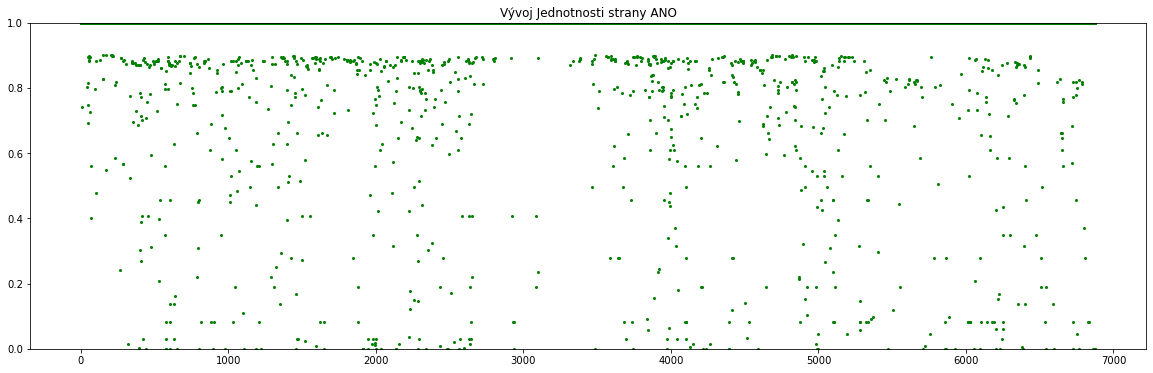

In [21]:
dataJednTime = pd.DataFrame(columns = strany) # Inicializace dat o časovém vývoji jednotnosti stran
dataWhole = pd.read_csv('votes_partys.csv', engine = 'python', skiprows = 1)
for i in range(votes):
    if (i % 60 == 0): # Progres
        print(i)
    data = dataWhole.head(i * 12 + 10).tail(10) # Získání dat o jednom hlasování
    data = data.drop(['Unnamed: 0'], axis = 1)
    data.index = strany
    data = data.drop(['Celkem']) # Celková jednotnost nedává smysl
    data = data.astype('int32') # Z nějakého důvodu jsou data typu Object a je tedy nutné přetypování
    data.insert(6, 'Jednotnost', 0)
    for party in data.index:
        if (data.loc[party, 'Ano'] + data.loc[party, 'Ne'] == 0): # Pokud jsou obě množiny prázdné, jednotnost bude 1
            data.loc[party, 'Jednotnost'] = 1
        else:   
            x = data.loc[party, 'Ano'] / (data.loc[party, 'Ano'] + data.loc[party, 'Ne']) # Poměr množin
            y = data.loc[party, 'Ne'] / (data.loc[party, 'Ano'] + data.loc[party, 'Ne'])
            if (x == 0 or y == 0): # Pokud je jedna z množin prázdná, jednotnost bude 1
                data.loc[party, 'Jednotnost'] = 1
            else:
                data.loc[party, 'Jednotnost'] = 1 - (-x * np.log2(x) - y * np.log2(y))
    dataJednTime = dataJednTime.append(data.Jednotnost, ignore_index = 'True') # Připojení řádku s jednotností na daném hlasování

plt.figure(figsize=(20,6))
plt.ylim(0, 1)
plt.title('Vývoj Jednotnosti strany ANO')
plt.plot(dataJednTime.index, dataJednTime.ANO, 'go', markersize = 2)

## Vizualizace výsledků důležitých hlasování
Jako důležitá hlasování jsem vybral ta, která měla vysokou docházku. Stoprocentní docházku nemělo žádné hlasování, Vybral jsem tedy ta, na kterých chyběl maximálně 1 poslanec, docházka byla tedy 99,5 %. Takových hlasování bylo zase velmi mnoho, vybral jsem tedy pouze první 4. Pro každé hlasování jsem ze souboru získal řádek s popisem a ten potom převedl na textový řetězec. Ten jsem u důležitých hlasování použil jako popisek grafu.

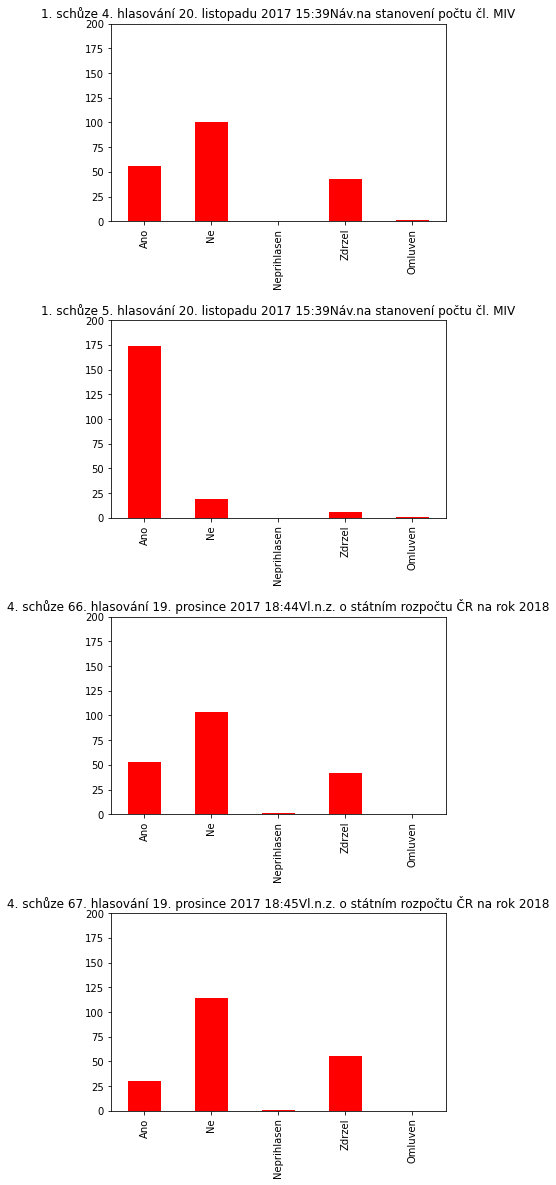

In [13]:
dataWhole = pd.read_csv('votes_partys.csv', engine = 'python', skiprows = 1)
displayed = 0 # Počet již zobrazených hlasování
plt.figure(figsize=(6,20))
plt.subplots_adjust(hspace = 0.5)
for i in range(votes):
    desc = dataWhole.head((i - 1) * 12 + 11).tail(1) # Získání řádku s popisem hlasování
    strDesc = str(desc.iloc[0, 0]) + str(desc.iloc[0, 1]) + str(desc.iloc[0, 2]) + str(desc.iloc[0, 3]) # Převod řádku na text
    data = dataWhole.head(i * 12 + 10).tail(10) # Získání dat o jednom hlasování
    data = data.drop(['Unnamed: 0'], axis = 1)
    data.index = strany
    data = data.astype('int32') # Z nějakého důvodu jsou data typu Object a je tedy nutné přetypování
    data.insert(6, 'Dochazka', 0)
    data.loc[:, 'Dochazka'] = (data.Ano + data.Ne + data.Zdrzel) / data.Poslancu # Hlasy Ano, Ne a Zdrzel znamenají, že poslanec se dostavil na hlasování
    if (data.loc['Celkem', 'Dochazka'] >= 0.995): # Důležité hlasování
        if (displayed < 4):
            plt.subplot(4, 1, displayed + 1)
            plt.ylim(0, 200)
            plt.title(strDesc.replace('\xa0', ' '))
            data.loc['Celkem', :].drop(['Poslancu', 'Dochazka']).plot.bar(color = 'Red')
            displayed += 1
        else:
            break

## Vybrání poslanců s podobnou docházkou
Hledal jsem skupinu deseti poslanců, kteří mají co nejpodobnější docházku. Použil jsem již seřazená data podle docházky. Pro každou skupinu deseti poslanců připadajících v úvahu jsem spočítal její průměrnou odchylku podle MSE a vybral skupinu s nejmenší odchylkou.

In [14]:
size = len(sortedDoch) # Počet poslanců
minim = 1000 # Inicializace minimální odchylky
res = {}
for begin in range(size - 10):
    group = sortedDoch.head(begin + 10).tail(10) # Skupina deseti poslanců s podobnou docházkou
    average = group.Dochazka.mean()
    group.insert(2, 'Odchylka', 0)
    group.loc[:, 'Odchylka'] = (group.Dochazka - average) * (group.Dochazka - average) / 10 # Výpočet průměrné odchylky podle MSE
    if (group.Odchylka.sum() < minim):
        minim = group.Odchylka.sum()
        res = group.drop(['Pocet', 'Odchylka'], axis = 1)

display(res)

Dochazka
Jmeno                       
Dominik Feri        0.839366
Leo Luzar           0.839366
Milan Hnilička      0.840529
Jaroslav Holík      0.840820
Tomio Okamura       0.840965
Jan Lipavský        0.841111
Stanislav Fridrich  0.843000
Marek Výborný       0.843437
Zbyněk Stanjura     0.844163
David Kasal         0.844309